# Setup:

In [38]:
# Initial imports

import numpy as np
import seaborn as sns
import requests
from dotenv import load_dotenv
import os
from fredapi import Fred

import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import holoviews as hv
from holoviews import opts
import matplotlib.pyplot as plt
import datetime


In [2]:
load_dotenv()

True

In [3]:
api_key=os.getenv("FRED_API_KEY")

In [4]:
# Use the type function to confirm the retrieval of the API key
type(api_key)

str

# Importing Data:

In [5]:
fred = Fred(api_key)

### M2 Data:

In [6]:
# Pull M2 data from January 1, 1980 - July 31, 2021,  Clean data, & put into a data frame
# M2: In Billions of Dollars, Calculated Monthly
m2_data = fred.get_series('M2SL')
m2_data.head()

1959-01-01    286.6
1959-02-01    287.7
1959-03-01    289.2
1959-04-01    290.1
1959-05-01    292.2
dtype: float64

In [7]:
# Real GDP: In Billions of Dollars, Calculated Quarterly
real_GDP_data = fred.get_series('GDPC1')
real_GDP_data.head()

1947-01-01    2034.450
1947-04-01    2029.024
1947-07-01    2024.834
1947-10-01    2056.508
1948-01-01    2087.442
dtype: float64

In [8]:
# Concatenate Data:
m2_real_gdp = pd.concat([real_GDP_data, m2_data], axis=1, join='inner')
m2_real_gdp.head()

,0,1
1959-01-01,3123.978,286.6
1959-04-01,3194.429,290.1
1959-07-01,3196.683,295.2
1959-10-01,3205.790,296.5
1960-01-01,3277.847,298.2


In [10]:
# Rename Columns:
m2_real_gdp.rename(columns = {0:'Real GDP', 1: 'M2'}, inplace = True)
m2_real_gdp.head()

,Real GDP,M2
1959-01-01,3123.978,286.6
1959-04-01,3194.429,290.1
1959-07-01,3196.683,295.2
1959-10-01,3205.790,296.5
1960-01-01,3277.847,298.2


## Clean Code:

In [11]:
# Check for null values:
m2_real_gdp.isnull().sum()

Real GDP    0
M2          0
dtype: int64

In [12]:
# Calculate % Yearly Change for each set of data.

# Calculate Daily Returns (Refer to HW_4, Whale of a Portfolio) and add to new column in the dataframe:
m2_real_gdp['Real GDP Pct Chng'] = m2_real_gdp['Real GDP'].pct_change()
m2_real_gdp.head()

,Real GDP,M2,Real GDP Pct Chng
1959-01-01,3123.978,286.6,NaN
1959-04-01,3194.429,290.1,0.022552
1959-07-01,3196.683,295.2,0.000706
1959-10-01,3205.790,296.5,0.002849
1960-01-01,3277.847,298.2,0.022477


In [13]:
m2_real_gdp['M2 Pct Chng'] = m2_real_gdp['M2'].pct_change()
m2_real_gdp.head()

,Real GDP,M2,Real GDP Pct Chng,M2 Pct Chng
1959-01-01,3123.978,286.6,NaN,NaN
1959-04-01,3194.429,290.1,0.022552,0.012212
1959-07-01,3196.683,295.2,0.000706,0.017580
1959-10-01,3205.790,296.5,0.002849,0.004404
1960-01-01,3277.847,298.2,0.022477,0.005734


# Visualizations:

In [14]:
# Calculate & show Correlation: USING SEABORN FOR THE HEATMAP from from January 1, 1980 - July 31, 2021
# Reducing DataFrame to only show relevant data
pct_chng_M2gdp = m2_real_gdp[['M2 Pct Chng', 'Real GDP Pct Chng']]
pct_chng_M2gdp.head()

,M2 Pct Chng,Real GDP Pct Chng
1959-01-01,NaN,NaN
1959-04-01,0.012212,0.022552
1959-07-01,0.017580,0.000706
1959-10-01,0.004404,0.002849
1960-01-01,0.005734,0.022477


In [16]:
# Change Return data to desired time frame: from January 1, 1980 - July 31, 2021
pct_chng_M2gdp = pct_chng_M2gdp['1980-01-01':'2021-07-31']
pct_chng_M2gdp.head()

,M2 Pct Chng,Real GDP Pct Chng
1980-01-01,0.015270,0.003145
1980-04-01,0.013152,-0.020605
1980-07-01,0.028824,-0.001188
1980-10-01,0.025429,0.018649
1981-01-01,0.013945,0.019594


## Create Correlation Visualization:

In [17]:
# Calculate the correlation
corr_m2_real_gdp = pct_chng_M2gdp.corr()

print(corr_m2_real_gdp)

                   M2 Pct Chng  Real GDP Pct Chng
M2 Pct Chng           1.000000          -0.202318
Real GDP Pct Chng    -0.202318           1.000000


[Text(0, 0.5, 'M2 Pct Chng'), Text(0, 1.5, 'Real GDP Pct Chng')]

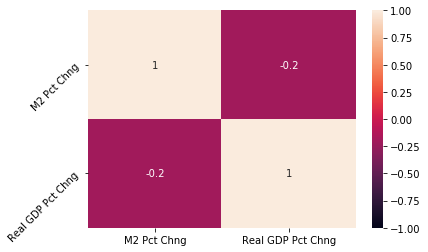

In [18]:
# Display de correlation matrix
corr_chart = sns.heatmap(corr_m2_real_gdp, annot=True, vmin=-1, vmax=1)
corr_chart.set_yticklabels(corr_chart.get_yticklabels(), rotation = 45)

[Text(0, 0.5, 'M2 Pct Chng'), Text(0, 1.5, 'Real GDP Pct Chng')]

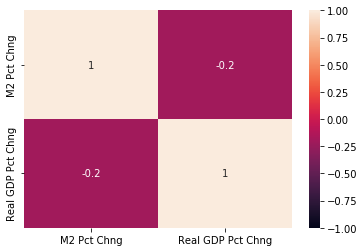

In [19]:
# Display de correlation matrix
corr_chart = sns.heatmap(corr_m2_real_gdp, annot=True, vmin=-1, vmax=1)
corr_chart.set_yticklabels(corr_chart.get_yticklabels(), verticalalignment='center')

## Make Line Plot, for entire timeframe
- Make Line Plot
- Include Marker for Important Dates

In [25]:
# Get DataFrame w/out pct Change:
m2_real_gdp_df = m2_real_gdp['1980-01-01':'2021-07-31'][['Real GDP', 'M2']]

In [32]:
m2_real_gdp_df.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

## Make focused Line PLot for each event: Add Markers.
- Pandemic: Jan. 1 2020 - 7.31.2021
- Financial Crisis: June 2007 - Dec. 31, 2009
- September 11: September 11, 2001

### Get Documentation on VLine:
hv.help(hv.VLine)

In [40]:
pandemic_startLine = hv.VLine(datetime.datetime(2020, 1, 1)).options(color='red')
# Test current label
pandemic_plot = m2_real_gdp_df.hvplot() * pandemic_startLine * hv.Text(datetime.datetime(2020, 1, 1), 21000, "Global Pandemic Starts")
pandemic_plot

:Overlay
   .NdOverlay.I :NdOverlay   [Variable]
      :Curve   [index]   (value)
   .VLine.I     :VLine   [x,y]
   .Text.I      :Text   [x,y]

In [41]:
financialCrisis_startLine = hv.VLine(datetime.datetime(2007, 6, 1)).options(color='red')
september11_startLine = hv.VLine(datetime.datetime(2001, 9, 11)).options(color='red')

In [48]:
labeled_plot = m2_real_gdp_df.hvplot() * pandemic_startLine * hv.Text(datetime.datetime(2020, 1, 1), 21000, "Global Pandemic Starts", halign='left') * \
financialCrisis_startLine * hv.Text(datetime.datetime(2007, 6, 1), 20000, "Financial Crisis", halign='left') * \
september11_startLine * hv.Text(datetime.datetime(2011, 9, 11), 19000, "Global Pandemic Starts", halign='left')
labeled_plot

:Overlay
   .NdOverlay.I :NdOverlay   [Variable]
      :Curve   [index]   (value)
   .VLine.I     :VLine   [x,y]
   .Text.I      :Text   [x,y]
   .VLine.II    :VLine   [x,y]
   .Text.II     :Text   [x,y]
   .VLine.III   :VLine   [x,y]
   .Text.III    :Text   [x,y]